In [1]:
%pwd

'C:\\Users\\sc522\\PROJECTS\\STAT\\IS5\\code\\ch02'

In [2]:
import pandas as pd
print(pd.__version__)

1.5.3


In [3]:
file_name = "../../dataset/ch02/titanic.txt"

In [4]:
titanic = pd.read_csv(file_name, sep='\t')  # load tab (\t) separated values from the data file

In [5]:
titanic.head()  # a few rows on the top, including header

,Name,Survived,Boarded,Class,MWC,Age,Adut_or_Chld,Sex,Paid,Ticket_No,Boat_or_Body,Job,Class_Dept,Class_Full
0,"ABBING, Mr Anthony",Dead,Southampton,3,Man,42.0,Adult,Male,7.55,5547,NaN,Blacksmith,3rd Class Passenger,3
1,"ABBOTT, Mr Ernest Owen",Dead,Southampton,Crew,Man,21.0,Adult,Male,NaN,NaN,NaN,Lounge Pantry Steward,Victualling Crew,V
2,"ABBOTT, Mr Eugene Joseph",Dead,Southampton,3,Child,14.0,Child,Male,20.25,CA2673,NaN,Scholar,3rd Class Passenger,3
3,"ABBOTT, Mr Rossmore Edward",Dead,Southampton,3,Man,16.0,Adult,Male,20.25,CA2673,[190],Jeweller,3rd Class Passenger,3
4,"ABBOTT, Mrs Rhoda Mary 'Rosa'",Alive,Southampton,3,Woman,39.0,Adult,Female,20.25,CA2673,A,NaN,3rd Class Passenger,3


In [6]:
print(f"Sample size: {len(titanic)}")  # f-string and built-in len function for length (number of rows)

Sample size: 2208


In [7]:
titanic["Class"].value_counts()  # Frequency Table (absolute)

Crew    889
3       710
1       324
2       285
Name: Class, dtype: int64

In [8]:
titanic.Class.value_counts(normalize=True)  # Frequency Table (relative)

Crew    0.402627
3       0.321558
1       0.146739
2       0.129076
Name: Class, dtype: float64

In [9]:
ticket_class = titanic.Class

In [10]:
print(ticket_class.dtype)

object


In [11]:
ticket_class = ticket_class.apply(str).astype('string')
print(ticket_class.dtype)

string


In [12]:
pd.crosstab(index=ticket_class, columns="count")  # pandas cross tabulation

col_0,count
Class,
1,324
2,285
3,710
Crew,889


In [13]:
titanic.groupby(['Class'])['Class'].count()  # group by the "Class" column, extract only that column, and then count

Class
1       324
2       285
3       710
Crew    889
Name: Class, dtype: int64

<Axes: >

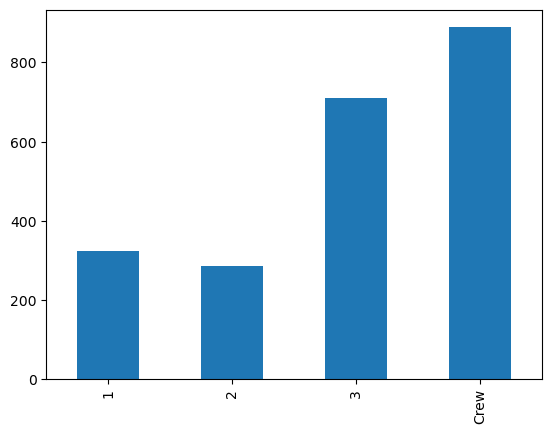

In [14]:
ticket_class.value_counts().sort_index().plot(kind='bar')  # pandas plot value_counts

<Axes: ylabel='Class'>

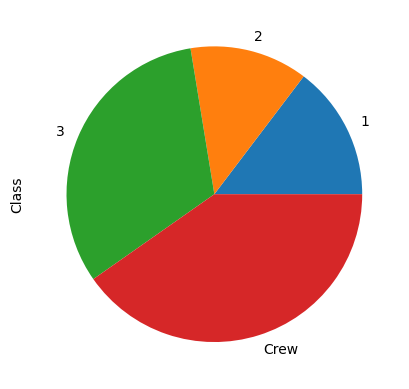

In [15]:
ticket_class.value_counts().sort_index().plot(kind='pie')  # pandas generate pie plot

In [16]:
import matplotlib as mpl
print(mpl.__version__)
import matplotlib.pyplot as plt

3.7.1


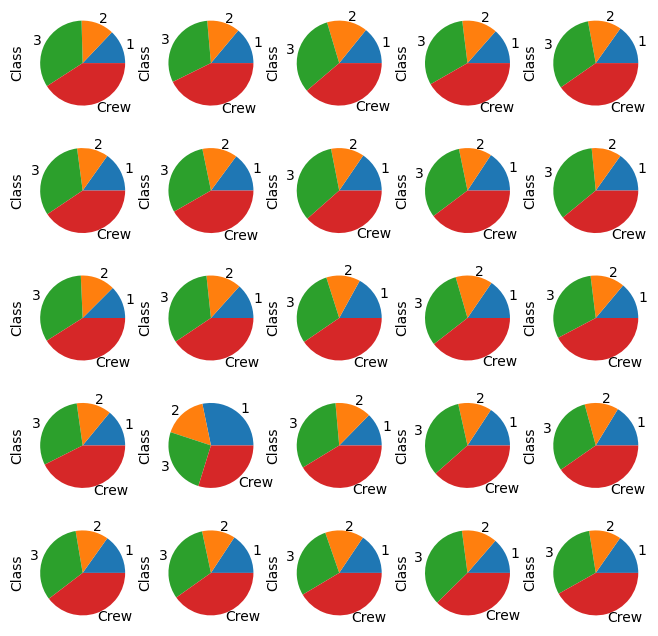

In [17]:
survivors = titanic.Survived[titanic.Survived == 'Alive'].count()  # number of survivors
fig, axes = plt.subplots(5, 5, figsize=(8, 8))  # a plot grid of 5x5
for r in range(5):
    for c in range(5):
        if (r, c) == (3, 1):
            # hide the real data
            titanic[titanic.Survived=='Alive']['Class'].value_counts().sort_index().plot(kind='pie', ax=axes[r, c])
        else:
            # simulated random sample
            ticket_class.sample(n=survivors).value_counts().sort_index().plot(kind='pie', ax=axes[r, c])

(array([ 56.,  38.,  30., 205., 425., 400., 341., 279., 169., 125.,  52.,
         42.,  31.,   7.,   5.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
        65., 70., 75.]),
 <BarContainer object of 15 artists>)

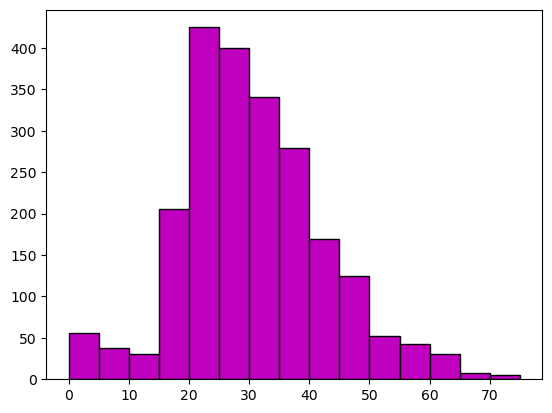

In [23]:
plt.hist(titanic['Age'], bins=range(0, 80, 5), color='m', edgecolor='k')  # pyplot histogram

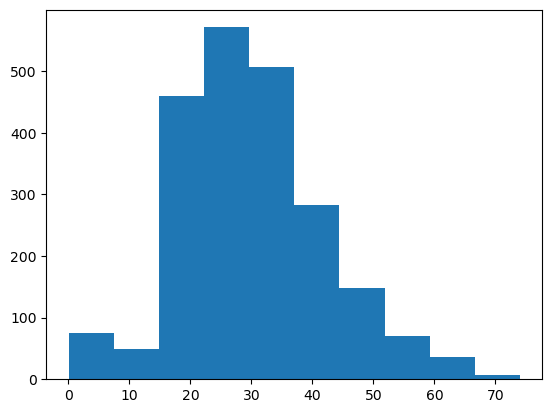

In [28]:
plt.hist(titanic['Age'], bins=10);

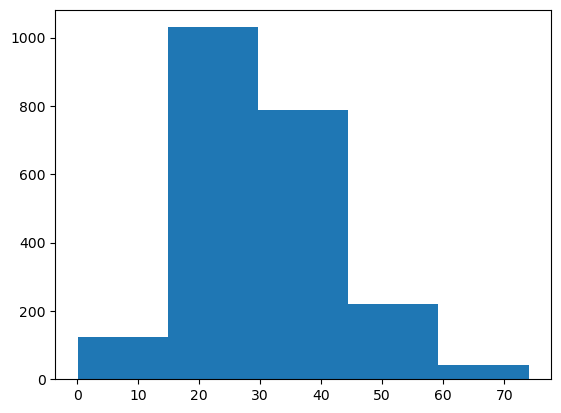

In [29]:
plt.hist(titanic['Age'], bins=5);

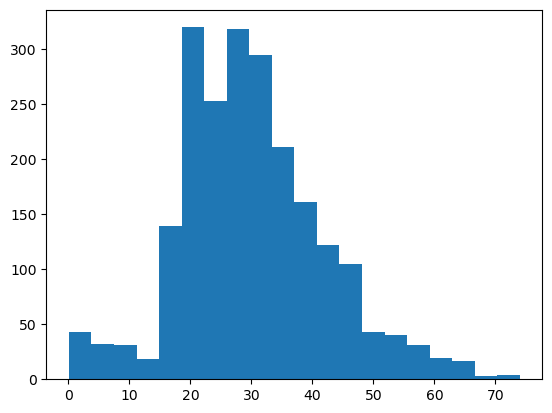

In [30]:
plt.hist(titanic['Age'], bins=20);

In [33]:
import seaborn as sns
print(seaborn.__version__)

0.12.2


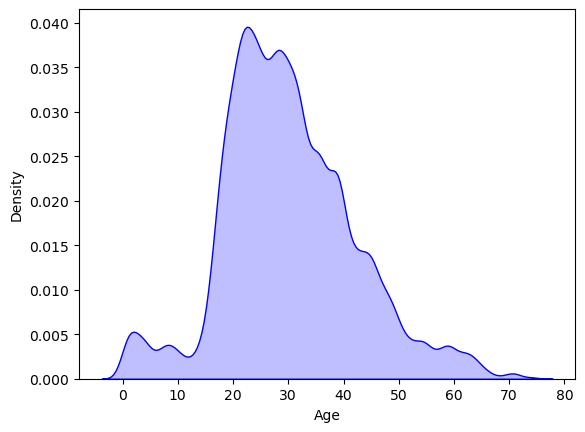

In [40]:
sns.kdeplot(titanic['Age'], fill=True, color='blue', bw_adjust=0.5);